# Exploratory Data Analysis on Paysim: 

In [ ]:
import numpy as np
import pandas as pd

## Data Description:
* **step: the step within the simulation**
    
* **type: the type of transaction (e.g., CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)**
    
* **amount: the amount of the transaction**
    
* **nameOrig: the customer who started the transaction**
    
* **oldbalanceOrg: the customer's balance before the transaction**
    
* **newbalanceOrig: the customer's balance after the transaction**
    
* **nameDest: the customer who is the recipient of the transaction**
    
* **oldbalanceDest: the recipient's balance before the transaction**
    
* **newbalanceDest: the recipient's balance after the transaction**
    
* **isFraud: whether the transaction is fraudulent (1) or not (0)**
    
* **isFlaggedFraud: whether the transaction is flagged as fraudulent (1) or not (0)**

In [2]:
paysim = pd.read_csv("PS_20174392719_1491204439457_log.csv")
paysim

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

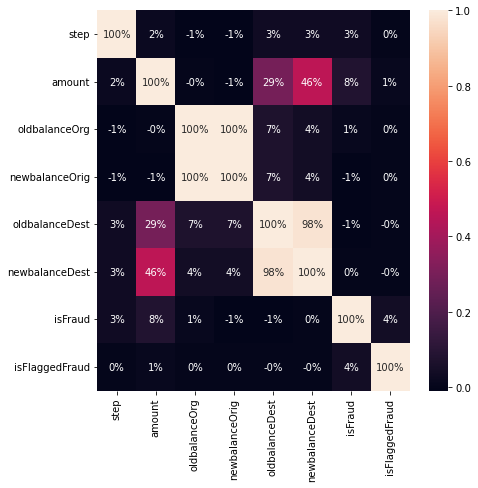

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns   
correlation=round(paysim.corr(),2)
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True, fmt='.0%')

In [6]:
paysim=paysim.drop(['isFlaggedFraud','step'],axis=1)

In [7]:
paysim

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [8]:
paysim.nunique()

type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

In [9]:
nullvalues = paysim.isnull().sum().sort_values(ascending=False)
nullvalues

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# What the data telling us?

In [10]:
print("No. of fraud transactions: {}, \nNo. of non-fraud transactions: {}".format((paysim.isFraud == 1).sum(),(paysim.isFraud == 0).sum()))

No. of fraud transactions: 8213, 
No. of non-fraud transactions: 6354407


In [11]:
paysimFraud = paysim.loc[paysim.isFraud == 1]
paysimNonFraud = paysim.loc[paysim.isFraud == 0]

In [12]:
print("What are the types for fraud transactions? {}".format(paysimFraud.type.drop_duplicates().values))
print("\nHow many unique origins are there in fraud transfer transactions? {} / {}".format(len(paysimFraud.loc[paysimFraud.type == 'TRANSFER'].nameOrig.drop_duplicates().values),len(paysimFraud.loc[paysimFraud.type == 'TRANSFER'])))
print("How many unique destinations are there in fraud transfer transactions? {} / {}".format(len(paysimFraud.loc[paysimFraud.type == 'TRANSFER'].nameDest.drop_duplicates().values),len(paysimFraud.loc[paysimFraud.type == 'TRANSFER'])))
print("\nHow many unique origins are there in fraud cash out transactions? {} / {}".format(len(paysimFraud.loc[paysimFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates().values),len(paysimFraud.loc[paysimFraud.type == 'CASH_OUT'])))
print("How many unique destinations are there in fraud cash out transactions? {} / {}".format(len(paysimFraud.loc[paysimFraud.type == 'CASH_OUT'].nameDest.drop_duplicates().values),len(paysimFraud.loc[paysimFraud.type == 'CASH_OUT'])))

What are the types for fraud transactions? ['TRANSFER' 'CASH_OUT']

How many unique origins are there in fraud transfer transactions? 4097 / 4097
How many unique destinations are there in fraud transfer transactions? 4097 / 4097

How many unique origins are there in fraud cash out transactions? 4116 / 4116
How many unique destinations are there in fraud cash out transactions? 4091 / 4116


In [13]:
paysimFraudTransfer = paysimFraud.loc[paysimFraud.type == 'TRANSFER']
paysimFraudCashout = paysimFraud.loc[paysimFraud.type == 'CASH_OUT']

print("How many fraud transfer transactions have destinations which are origins in fraud cash out transactions? {}".\
     format(paysimFraudTransfer.nameDest.isin(paysimFraudCashout.nameOrig.unique()).sum()))

print("\nHow many fraud transfer transactions have destinations which are origins in genuine cash out transactions? {}".\
     format(paysimFraudTransfer.nameDest.isin(paysimNonFraud.loc[paysimNonFraud.type == 'CASH_OUT'].nameOrig.unique()).sum()))
print("How many genuine transfer transactions have destinations which are origins in fraud cash out transactions? {}".\
     format(paysimNonFraud.loc[paysimNonFraud.type == 'TRANSFER'].nameDest.isin(paysimFraudCashout.nameOrig.unique()).sum()))

print("\nHow many genuine transfer transactions have destinations which are destinations in fraud transfer transactions? {}".\
     format(paysimNonFraud.loc[paysimNonFraud.type == 'TRANSFER'].nameDest.isin(paysimFraudTransfer.nameDest.unique()).sum()))
print("How many genuine transfer transactions have origins which are destinations in fraud transfer transactions? {}".\
     format(paysimNonFraud.loc[paysimNonFraud.type == 'TRANSFER'].nameOrig.isin(paysimFraudTransfer.nameDest.unique()).sum()))
print("How many genuine transfer transactions have origins which are origins in fraud transfer transactions? {}".\
     format(paysimNonFraud.loc[paysimNonFraud.type == 'TRANSFER'].nameOrig.isin(paysimFraudTransfer.nameOrig.unique()).sum()))
print("How many genuine transfer transactions have destinations which are origins in fraud transfer transactions? {}".\
     format(paysimNonFraud.loc[paysimNonFraud.type == 'TRANSFER'].nameDest.isin(paysimFraudTransfer.nameOrig.unique()).sum()))

How many fraud transfer transactions have destinations which are origins in fraud cash out transactions? 0

How many fraud transfer transactions have destinations which are origins in genuine cash out transactions? 3
How many genuine transfer transactions have destinations which are origins in fraud cash out transactions? 0

How many genuine transfer transactions have destinations which are destinations in fraud transfer transactions? 1701
How many genuine transfer transactions have origins which are destinations in fraud transfer transactions? 1
How many genuine transfer transactions have origins which are origins in fraud transfer transactions? 2
How many genuine transfer transactions have destinations which are origins in fraud transfer transactions? 0


In [14]:
print('Min, Max of Fraud Transactions: {} - {}'.format(paysimFraud.amount.min(),paysimFraud.amount.max()))
print('Min, Max of Non-Fraud Transactions: {} - {}'.format(paysimNonFraud.amount.min(),paysimNonFraud.amount.max()))


Min, Max of Fraud Transactions: 0.0 - 10000000.0
Min, Max of Non-Fraud Transactions: 0.01 - 92445516.64


In [17]:
paysim.to_csv('paysim_cleaned.csv')